In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

C:\Users\hayashi\anaconda3\envs\tensorflow\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\hayashi\anaconda3\envs\tensorflow\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
#インポートしたデータの形を確認
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


In [3]:
x_train = x_train.reshape(60000, 784)
x_train = x_train/255.
x_test = x_test.reshape(10000, 784)
x_test = x_test/255.

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [5]:
from tensorflow.keras.layers import Dense

model.add(
    Dense(
        units = 64,
        input_shape = (784,),
        activation = 'relu'
    )
)

C:\Users\hayashi\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.add(
    Dense(
        units = 10,
        activation = 'softmax'
    )
)

In [7]:
from tensorflow.keras.callbacks import TensorBoard

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
tsb = TensorBoard(log_dir='./logs')
history_adam = model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 20,
    validation_split = 0.2,
    callbacks = [tsb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8434 - loss: 0.5552 - val_accuracy: 0.9440 - val_loss: 0.1963
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9474 - loss: 0.1794 - val_accuracy: 0.9558 - val_loss: 0.1509
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9644 - loss: 0.1201 - val_accuracy: 0.9634 - val_loss: 0.1274
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9709 - loss: 0.0974 - val_accuracy: 0.9670 - val_loss: 0.1121
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0759 - val_accuracy: 0.9700 - val_loss: 0.1043
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9803 - loss: 0.0632 - val_accuracy: 0.9680 - val_loss: 0.1086
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0507 - val_accuracy: 0.9706 - val_loss: 0.0992
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9863 - loss: 0.0445 - 

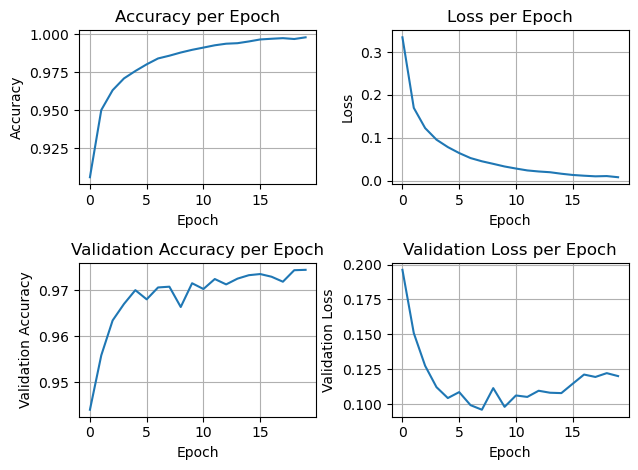

In [17]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(history_adam.history['loss'], label='Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(history_adam.history['val_loss'], label='Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss per Epoch')
plt.grid(True)

plt.tight_layout()

plt.savefig('FFNNtraining_results.png')

plt.show()

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard 
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_train = x_train/255.
x_test = x_test.reshape(10000, 784)
x_test = x_test/255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
tsb = TensorBoard(log_dir = './logs')

In [10]:
input = Input(shape = (784,))
middle = Dense(units = 64, activation = 'relu')(input)
output = Dense(units = 10, activation = 'softmax')(middle)
model = Model(inputs = [input], outputs = [output])

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
history_adam2 = model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 20,
    callbacks = [tsb],
    validation_split = 0.2
)

Epoch 1/20


C:\Users\hayashi\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(32, 784))
  warnings.warn(msg)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8436 - loss: 0.5566 - val_accuracy: 0.9434 - val_loss: 0.1983
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9493 - loss: 0.1752 - val_accuracy: 0.9578 - val_loss: 0.1475
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9650 - loss: 0.1210 - val_accuracy: 0.9672 - val_loss: 0.1171
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9712 - loss: 0.0959 - val_accuracy: 0.9676 - val_loss: 0.1121
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9787 - loss: 0.0733 - val_accuracy: 0.9672 - val_loss: 0.1053
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9808 - loss: 0.0635 - val_accuracy: 0.9704 - val_loss: 0.1076
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9838 - loss: 0.0560 - val_accuracy: 0.9691 - val_loss: 0.1109
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9862 - loss: 0.0458 - val_accurac

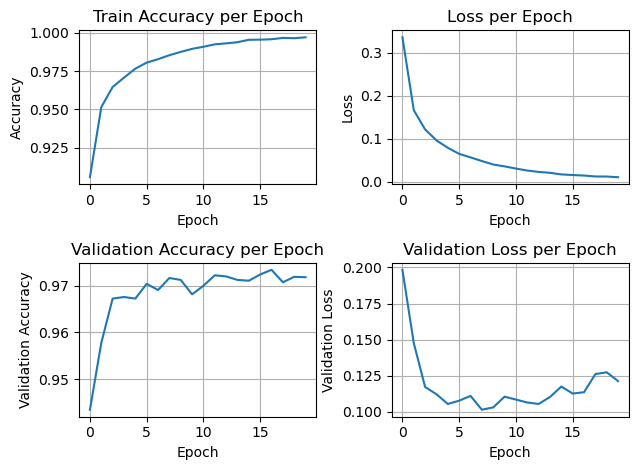

In [16]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(history_adam2.history['accuracy'], label='Train Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy per Epoch')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(history_adam2.history['loss'], label='Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(history_adam2.history['val_accuracy'], label='Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(history_adam2.history['val_loss'], label='Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss per Epoch')
plt.grid(True)

plt.tight_layout()

plt.savefig('FFNNtraining_results2.png')

plt.show()